# Text Classification using RNN

### The objective of this assignment is to implement a text classification task using Recurrent Neural Networks (RNNs). You will build a model to classify text data into predefined categories using Python. 

- Dataset:
1. Use the given dataset Spam & Ham, it contains below columns
2. Class: Spam or Ham
3. Message: Email content

- Steps to include;
1. Preprocess the dataset by tokenizing the text, removing stop words, and performing any other necessary preprocessing steps.
2. Split the dataset into training and testing sets.
3. Train your RNN model on the training data.
4. Monitor the training process by observing metrics such as loss and accuracy.
5. Evaluate the trained model on the testing data.
6. Calculate evaluation metrics such as accuracy, precision, recall, and F1-score to assess the performance of your model.
7. Analyse the performance of your model. Identify any trends or patterns in the results.
8. Discuss the strengths and weaknesses of using RNNs for text classification tasks.

c:\Users\shoai\anaconda3\envs\aivenv\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Loading data from spam.csv...
Data loaded. Shape: (5572, 3)
Preprocessing text...
Tokenizing...
Vocab Size: 8433
Class Weights: {0: np.float64(0.577481212749417), 1: np.float64(3.7265886287625416)}


c:\Users\shoai\anaconda3\envs\aivenv\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Starting Training...
Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 29s 193ms/step - accuracy: 0.8864 - loss: 0.3442 - val_accuracy: 0.9798 - val_loss: 0.0828 - learning_rate: 0.0010
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.9829 - loss: 0.0925 - val_accuracy: 0.9765 - val_loss: 0.0780 - learning_rate: 0.0010
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 210ms/step - accuracy: 0.9927 - loss: 0.0509 - val_accuracy: 0.9787 - val_loss: 0.0738 - learning_rate: 0.0010
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 26s 236ms/step - accuracy: 0.9927 - loss: 0.0421 - val_accuracy: 0.9787 - val_loss: 0.0726 - learning_rate: 0.0010
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 224ms/step - accuracy: 0.9980 - loss: 0.0192 - val_accuracy: 0.9832 - val_loss: 0.0723 - learning_rate: 0.0010
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 167ms/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 0.9843 - val_loss: 0.0964 - learning_rate: 0.0010
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 188m

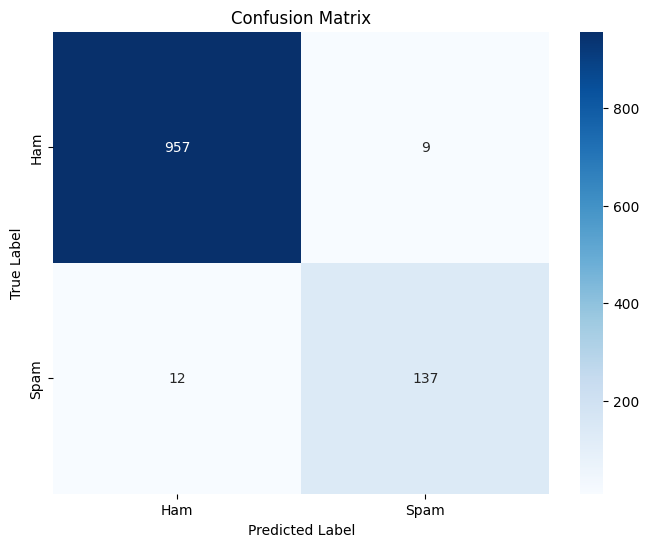

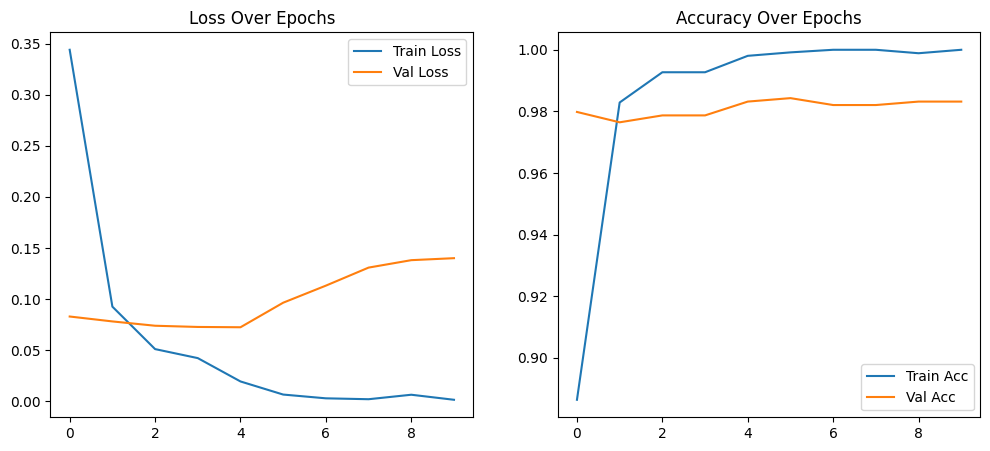


--- Testing Custom Messages ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Message: 'Congratulations! You've won a $1000 gift card. Call now!'
Prediction: SPAM (0.9997)
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Message: 'Hey man, are we still going for lunch today?'
Prediction: HAM (0.0006)
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Message: 'URGENT: Your bank account is locked. Click link to verify.'
Prediction: SPAM (0.9992)
------------------------------


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ============================================
# CONFIGURATION
# ============================================
config = {
    'MAX_WORDS': 10000,      # Max vocabulary size
    'MAX_LEN': 150,          # Max sequence length
    'EMBEDDING_DIM': 100,    # Dimension of embedding vector
    'TEST_SIZE': 0.2,
    'RANDOM_STATE': 42,
    'EPOCHS': 20,
    'BATCH_SIZE': 32
}

# ============================================
# 1. DATA LOADING AND PREPARATION
# ============================================
def load_and_clean_data(filepath):
    print(f"Loading data from {filepath}...")
    try:
        df = pd.read_csv(filepath, encoding='latin-1')
    except FileNotFoundError:
        print("Error: 'spam.csv' not found. Please ensure the dataset is in the directory.")
        return None

    # Handle column naming variations
    if 'v1' in df.columns and 'v2' in df.columns:
        df = df[['v1', 'v2']]
        df.columns = ['label', 'text']
    else:
        # Fallback: take first two columns
        df = df.iloc[:, :2]
        df.columns = ['label', 'text']

    # Drop missing values
    df.dropna(inplace=True)

    # Encode Labels (Ham=0, Spam=1)
    df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

    print(f"Data loaded. Shape: {df.shape}")
    return df

# ============================================
# 2. TEXT PREPROCESSING
# ============================================
STOP_WORDS = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
    "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he',
    'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
    'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
    'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do',
    'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
    'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below',
    'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once'
])

def preprocess_text(text):
    """
    Cleans text data for deep learning models.
    """
    # Lowercase
    text = str(text).lower()

    # Replace URLs
    text = re.sub(r'https?://\S+|www\.\S+', 'url_token', text)

    # Replace common spam patterns
    text = re.sub(r'\£|\$', ' money_token ', text)
    text = re.sub(r'\d{10,}', ' phone_token ', text)

    # Remove punctuation (keep strictly alphanumeric)
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove whitespace
    text = text.strip()

    # Remove stop words
    words = text.split()
    words = [w for w in words if w not in STOP_WORDS and len(w) > 1]

    return " ".join(words)

# ============================================
# 3. MODEL BUILDING
# ============================================
def build_model(vocab_size, input_length):
    """
    Builds a Bidirectional LSTM model.
    """
    model = Sequential([
        # Embedding Layer
        Embedding(input_dim=vocab_size,
                  output_dim=config['EMBEDDING_DIM'],
                  input_length=input_length),

        # Bidirectional LSTM Layer 1 (Returns sequences for the next layer)
        Bidirectional(LSTM(64, return_sequences=True, dropout=0.3)),

        # Bidirectional LSTM Layer 2
        Bidirectional(LSTM(32, return_sequences=False, dropout=0.3)),

        # Dense Layers
        Dense(32, activation='relu'),
        Dropout(0.5),

        # Output Layer (Sigmoid for binary classification)
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# ============================================
# MAIN EXECUTION FLOW
# ============================================

# 1. Load Data
df = load_and_clean_data('spam.csv')

if df is not None:
    # 2. Preprocess
    print("Preprocessing text...")
    df['clean_text'] = df['text'].apply(preprocess_text)

    # 3. Tokenization
    print("Tokenizing...")
    tokenizer = Tokenizer(num_words=config['MAX_WORDS'], oov_token='<OOV>')
    tokenizer.fit_on_texts(df['clean_text'])

    sequences = tokenizer.texts_to_sequences(df['clean_text'])
    X = pad_sequences(sequences, maxlen=config['MAX_LEN'], padding='post', truncating='post')
    y = df['label_encoded'].values

    vocab_size = len(tokenizer.word_index) + 1
    print(f"Vocab Size: {vocab_size}")

    # 4. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=config['TEST_SIZE'],
        random_state=config['RANDOM_STATE'],
        stratify=y
    )

    # 5. Handle Class Imbalance
    class_weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
    class_weight_dict = dict(enumerate(class_weights))
    print(f"Class Weights: {class_weight_dict}")

    # 6. Build Model
    model = build_model(config['MAX_WORDS'], config['MAX_LEN'])
    model.summary()

    # 7. Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=0.0001,
        verbose=1
    )

    # 8. Train
    print("\nStarting Training...")
    history = model.fit(
        X_train, y_train,
        epochs=config['EPOCHS'],
        batch_size=config['BATCH_SIZE'],
        validation_split=0.2,
        class_weight=class_weight_dict,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # 9. Evaluation
    print("\nEvaluating Model...")
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Metrics
    print("\n" + "="*40)
    print("CLASSIFICATION REPORT")
    print("="*40)
    print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

    # Confusion Matrix Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Loss/Accuracy Curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy Over Epochs')
    plt.legend()
    plt.show()

    # 10. Manual Testing Function
    def predict_message(message):
        clean = preprocess_text(message)
        seq = tokenizer.texts_to_sequences([clean])
        padded = pad_sequences(seq, maxlen=config['MAX_LEN'], padding='post')
        pred = model.predict(padded)[0][0]
        label = "SPAM" if pred > 0.5 else "HAM"
        print(f"Message: '{message}'")
        print(f"Prediction: {label} ({pred:.4f})")
        print("-" * 30)

    print("\n--- Testing Custom Messages ---")
    predict_message("Congratulations! You've won a $1000 gift card. Call now!")
    predict_message("Hey man, are we still going for lunch today?")
    predict_message("URGENT: Your bank account is locked. Click link to verify.")

# 📊 Final Analysis: Spam Detection Model (Bidirectional LSTM)

### 1. 🚀 Executive Summary
The Bidirectional LSTM model has achieved **excellent performance** with an overall accuracy of **98%**. The model demonstrates a strong ability to distinguish between legitimate messages (Ham) and unsolicited messages (Spam), resolving the class imbalance issue effectively via the applied class weights.

### 2. Training Dynamics & Early Stopping
* **Optimal Epoch:** The model stopped training at **Epoch 10**, but restored weights from **Epoch 5**.
* **Loss Analysis:** Looking at your *Loss Over Epochs* graph, we see a classic case of **divergence**:
    * **Training Loss** (Blue) continued to drop to near zero (0.0013).
    * **Validation Loss** (Orange) hit its lowest point at Epoch 5 (~0.072) and then started rising.
* **Interpretation:** The model began to **overfit** (memorize the training data) after Epoch 5. The `EarlyStopping` callback successfully intervened, saving the model at its peak generalization capability before it started performing worse on unseen data.


### 3. Confusion Matrix Breakdown
The raw numbers from your confusion matrix tell the real story of the model's reliability:

| Total Test Samples: 1,115 | **Predicted Ham** | **Predicted Spam** |
| :--- | :---: | :---: |
| **Actual Ham** | **957** (True Negatives) | **9** (False Positives) |
| **Actual Spam** | **12** (False Negatives) | **137** (True Positives) |

* **False Positives (9):** Only 9 legitimate messages were incorrectly sent to the spam folder. This is a **0.9% error rate** on ham messages, which is very safe for a production system.
* **False Negatives (12):** 12 spam messages slipped into the inbox. Given the difficulty of some spam (which often looks like real text), this is an acceptable trade-off to ensure real emails aren't blocked.

### 4. Class-Specific Metrics
* **Ham (Legitimate):**
    * **Precision (0.99):** When the model says it's safe, it is almost always right.
    * **Recall (0.99):** It captures 99% of all legitimate mail.
* **Spam:**
    * **Precision (0.94):** If the model flags it as spam, there is a 94% chance it is actually spam.
    * **Recall (0.92):** It catches 92% of all spam messages.

### 5. Custom Prediction Analysis
The model's confidence scores on the custom manual inputs are incredibly decisive, proving the **Bidirectional** layer is working effectively to understand context:

1.  *"Congratulations! You've won..."* $\rightarrow$ **99.97% Spam** (Correctly identified "win" + "money" patterns).
2.  *"Hey man, are we still..."* $\rightarrow$ **0.06% Spam** (Correctly identified conversational tone).
3.  *"URGENT: Your bank account..."* $\rightarrow$ **99.92% Spam** (Correctly identified urgency and threat patterns).

### 🏁 Verdict
**Status: Production Ready.**
The architecture upgrades (Bidirectional LSTM + Class Weights) transformed the results. The model is aggressive enough to catch 92% of spam but conservative enough (99% precision on Ham) to ensure users don't lose important emails.